## 1-Import Library

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 2-Load The Dataset

In [3]:
df = pd.read_csv('Semaai Data Analyst Internship Case Study_Dataset.csv')

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [63]:
data = df.copy()

In [66]:
data['Description'] = data['Description'].str.lower()
data['revenue'] = data['Price'] * data['Quantity']

In [68]:
data.to_csv('data.csv')

In [4]:
df_ori = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1044848 non-null  object 
 1   StockCode    1044848 non-null  object 
 2   Description  1040573 non-null  object 
 3   Quantity     1044848 non-null  int64  
 4   InvoiceDate  1044848 non-null  object 
 5   Price        1044848 non-null  float64
 6   Customer ID  809561 non-null   float64
 7   Country      1044848 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.8+ MB


In [6]:
miss = pd.DataFrame(df.isnull().sum(), columns=['missing_value'])
miss['percent'] = (miss/len(df)).round(3) * 100

miss

,missing_value,percent
Invoice,0,0.0
StockCode,0,0.0
Description,4275,0.4
Quantity,0,0.0
InvoiceDate,0,0.0
Price,0,0.0
Customer ID,235287,22.5
Country,0,0.0


In [7]:
df['StockCode'].unique()

array(['85048', '79323P', '79323W', ..., '23609', '23617', '23843'],
      dtype=object)

In [61]:
df[df['StockCode'] == '79323W']['Description'].unique()

array([' WHITE CHERRY LIGHTS', 'WHITE CHERRY LIGHTS', nan,
       'Unsaleable, destroyed.'], dtype=object)

In [57]:
df[df['StockCode'] == '79323P']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
209,489460,79323P,PINK CHERRY LIGHTS,8,12/1/2009 10:46,6.75,16167.0,United Kingdom
939,489539,79323P,PINK CHERRY LIGHTS,24,12/1/2009 12:18,5.45,15061.0,United Kingdom
1761,C489588,79323P,PINK CHERRY LIGHTS,-2,12/1/2009 14:01,6.75,13711.0,United Kingdom
3128,489656,79323P,PINK CHERRY LIGHTS,48,12/1/2009 17:28,5.45,17428.0,United Kingdom
...,...,...,...,...,...,...,...,...
432163,C530710,79323P,PINK CHERRY LIGHTS,-1,11/4/2010 11:31,6.75,17362.0,United Kingdom
553964,C540634,79323P,PINK CHERRY LIGHTS,-4,1/10/2011 12:02,6.75,13672.0,United Kingdom
556141,540825,79323P,PINK CHERRY LIGHTS,4,1/11/2011 13:54,6.75,13672.0,United Kingdom
590941,C543744,79323P,PINK CHERRY LIGHTS,-4,2/11/2011 13:43,6.75,13672.0,United Kingdom


In [62]:
df[df['Invoice'] ==  'POST']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [9]:
df[df['Description'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,12/1/2009 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,12/1/2009 17:26,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,12/1/2009 17:39,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,12/2/2009 11:45,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,12/2/2009 12:42,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1038260,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
1038264,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
1038270,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
1039919,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [10]:
df[df['StockCode'] == '20683']['Description'].unique()

array([nan, 'RAIN GIRL CHILDS UMBRELLA'], dtype=object)

## 3-EDA

### 1.Number of the rows and columns

In [13]:
print("Number of rows in the dataset is: ", df.shape[0], "Rows")
print("Number of columns in the dataset is: ", df.shape[1], "Columns")

Number of rows in the dataset is:  1044848 Rows
Number of columns in the dataset is:  8 Columns


### 2.Unique value

In [14]:
# Get Numerical Columns and Categorical Columns (original)
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

- numerical columns

In [30]:
print('Numerical Columns : \n',df[num_columns].nunique().sort_values(ascending=False))

Numerical Columns : 
 Customer ID    5942
Price          2806
Quantity       1057
dtype: int64


- categorical columns

In [18]:
print(f'Categorical Columns : {len(cat_columns)} total colunms')
for i in cat_columns:
    cat = df[i].unique()
    print(f'{i} ({len(cat)}):',cat)
    print('----------------------------------------')

Categorical Columns : 5 total colunms
Invoice (53628): ['489434' '489435' '489436' ... '581585' '581586' '581587']
----------------------------------------
StockCode (5305): ['85048' '79323P' '79323W' ... '23609' '23617' '23843']
----------------------------------------
Description (5699): ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
----------------------------------------
InvoiceDate (47635): ['12/1/2009 7:45' '12/1/2009 7:46' '12/1/2009 9:06' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50']
----------------------------------------
Country (43): ['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda'

### 3.Anomalies in the Data

1. Check Descriptive Stattistics

In [31]:
df.describe(include='object')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1044848,1044848,1040573,1044848,1044848
unique,53628,5305,5698,47635,43
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,5711,5798,1114,959983


In [32]:
df.describe()

,Quantity,Price,Customer ID
count,1.044848e+06,1.044848e+06,809561.000000
mean,9.993649e+00,4.590546e+00,15319.760422
std,1.742185e+02,1.217042e+02,1695.812057
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.100000e+00,15248.000000
75%,1.000000e+01,4.130000e+00,16792.000000
max,8.099500e+04,3.897000e+04,18287.000000


From the given table, we can see that there is a negative value for quantity and price, which are not possible.

In [38]:
df.query('Price < 0')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,4/29/2010 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,7/19/2010 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,10/20/2010 12:04,-38925.87,NaN,United Kingdom
802921,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
802922,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [52]:
df[df['Invoice'].duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [44]:
cancelled = df.query('Quantity < 0')

cancelled

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1043387,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
1044479,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
1044653,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
1044654,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [48]:
cancelled[cancelled['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,12/1/2009 10:52,0.0,NaN,United Kingdom
283,489463,71477,short,-240,12/1/2009 10:52,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/2009 10:53,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,12/1/2009 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,12/1/2009 17:26,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1038271,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
1038273,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
1038274,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
1039848,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


---

In [41]:
# Function to create histogram and cecking outlier.

def cek_outlier(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='grey', edgecolor='black')
    plt.title(f'{variable} Histogram')

    cek_skew0 = df[variable].skew()
    print (f'{variable} Skewness :', cek_skew0)

    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])

    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])

    if cek_skew0 < 0.5 and cek_skew0 > -0.5:
        # Boxplot normal distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys')
        plt.title('Boxplot normal dist.')
        plt.show()
        
        print(f'normal distribution - Jumlah {variable} outlier : ', len(total_normal))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper)/len(df[variable]) * 100) + (len(outlier_lower)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')
    else :
        # Boxplot skewed distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys', showmeans=True)
        plt.title('Boxplot skewed dist.')
        plt.show()

        # Mean, median, modus
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]

        if  mean > median and median > mode :
            print (f'Right skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        elif mean < median and median < mode :
            print (f'Left skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        else:
            print(f'skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
            
        # print(f'Jumlah {variable} outlier : ', len(total_skew))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper_skew)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower_skew)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper_skew)/len(df[variable]) * 100) + (len(outlier_lower_skew)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')


In [11]:
# Function to see precentage of every outlier  
def rank_normal(df, variable):
    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])
    pctg = (len(total_normal)/len(df[variable])* 100)
    return variable, len(total_normal), round(pctg,2)

def rank_skew(df, variable):
    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])
    pctg = (len(total_skew)/len(df[variable])* 100)
    return variable, len(total_skew), round(pctg,2)

In [12]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(num_col)

['Quantity', 'Price', 'Customer ID']


Quantity Skewness : 4.116107007811625


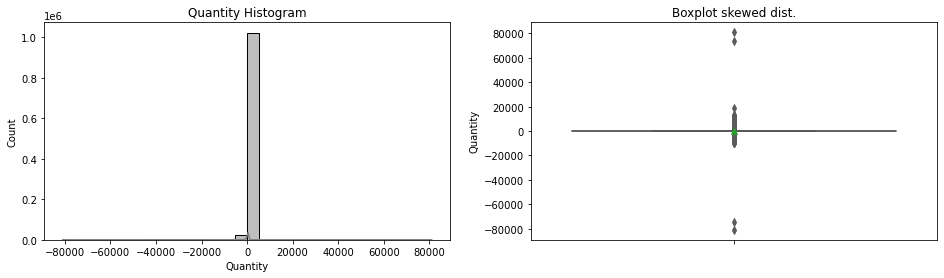

Right skewed distribution, Jumlah Quantity outlier :  43631
jumlah data :  1044848
% upper outliers :  3.904
% lower outliers :  0.271
% Total outliers :  4.176
--------------------------------------------------------------------------------------------------------

Price Skewness : -79.42515681784187


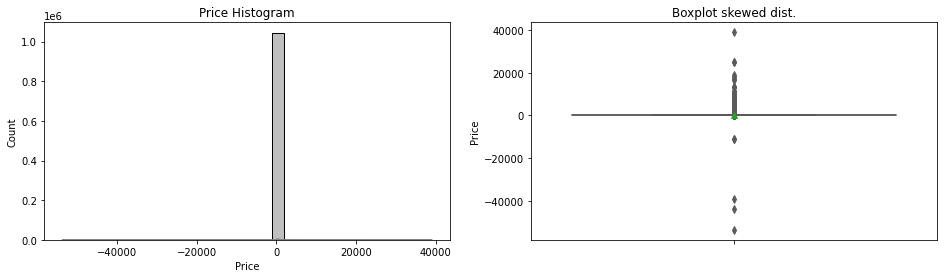

Right skewed distribution, Jumlah Price outlier :  25483
jumlah data :  1044848
% upper outliers :  2.438
% lower outliers :  0.0
% Total outliers :  2.439
--------------------------------------------------------------------------------------------------------

Customer ID Skewness : 0.00981951613319261


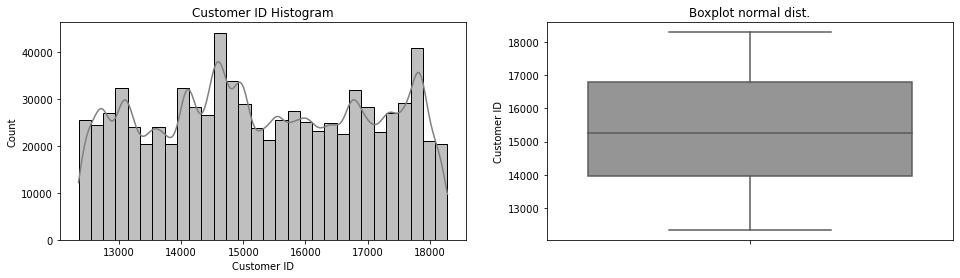

normal distribution - Jumlah Customer ID outlier :  0
jumlah data :  1044848
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------



In [42]:

for i in num_col:
    cek_outlier(df, i)

In [14]:
# looping untuk membagi data normal distribution dan skewed distribution
normal = []
skew = []
for i in num_col:
    if df[i].skew() > - 0.5 and df[i].skew() < 0.5 :
        normal.append(i)
    else :
        skew.append(i)

normal_list = []
skew_list = []

for i in normal:
    normal_list.append(rank_normal(df, i))

for i in skew:
    skew_list.append(rank_skew(df, i))

In [15]:
normal_list

[('Customer ID', 0, 0.0)]

In [16]:
skew_list

[('Quantity', 43631, 4.18), ('Price', 25483, 2.44)]

In [36]:
df.describe()

,Quantity,Price,Customer ID
count,1.044848e+06,1.044848e+06,809561.000000
mean,9.993649e+00,4.590546e+00,15319.760422
std,1.742185e+02,1.217042e+02,1695.812057
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.100000e+00,15248.000000
75%,1.000000e+01,4.130000e+00,16792.000000
max,8.099500e+04,3.897000e+04,18287.000000
